In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import os, shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1 = '/content/drive/MyDrive/Colab_Notebooks/CNN'
genpath = './drive/MyDrive/Colab_Notebooks/GenImg'

In [ ]:
# 定義ImageDataGenerator
img_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=10, 
                             width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)

# 定義ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
if os.path.exists(genpath):
    shutil.rmtree(genpath)
os.makedirs(genpath)

n = 1
for p in os.listdir(path1):
    path2 = path1 + f'/{p}'
    genpath2 = genpath + f'/{p}'
    if not os.path.exists(genpath2):
        os.makedirs(genpath2)
    gen_data = img_gen.flow_from_directory(path1, batch_size=10, shuffle=False, save_to_dir=genpath2,
              classes = [f'{p}'], class_mode = 'binary', save_prefix=f'{p}', save_format='jpg', target_size=(224, 224))
    for i in range(40):
        gen_data.next()

Found 40 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.


In [ ]:
x = []
y = []
n = 1
for p in os.listdir(path1):
    path2 = path1 + f'/{p}'
    genpath2 = genpath + f'/{p}'
    for i in os.listdir(path2):
        img = cv2.imread(f'{path2}/{i}')
        img = cv2.resize(img, (224, 224))
        x.append(np.array(img))
        y.append(str(p))
    for i in os.listdir(genpath2):
        img = cv2.imread(f'{genpath2}/{i}')
        img = cv2.resize(img, (224, 224))
        x.append(np.array(img))
        y.append(str(p))


In [ ]:
x = np.asarray(x)
x.shape

(3960, 224, 224, 3)

In [ ]:
import pandas as pd
df = pd.DataFrame(y)
df[0]
y = df[0].map({'iMeiMilk': 0, 'LimFengInMilk': 1, 'JuHsiangMilk': 2, 'FreshDelightMilk': 3, 'KuangChuanMilk': 4, 
               'LargeReiSuiMilk': 5, 'SmallReiSuiMilk': 6, 'LowFatLargeReiSuiMilk': 7, 'LowFatSmallReiSuiMilk': 8})
print(y)

0       3
1       3
2       3
3       3
4       3
       ..
3955    8
3956    8
3957    8
3958    8
3959    8
Name: 0, Length: 3960, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3564, 224, 224, 3)
(3564,)
(396, 224, 224, 3)
(396,)


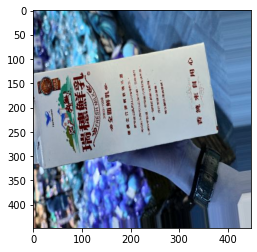

In [ ]:
#x[:1]
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
# 使用 函數式接口 functional API 建模
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu')(i)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(9, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# 編譯模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 訓練模型
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[learning_rate_function])

# 儲存訓練好的model
model.save('/content/drive/MyDrive/Colab_Notebooks/model_0917.h5')

Epoch 1/100
112/112 [==============================] - 151s 1s/step - loss: 1239.7483 - accuracy: 0.5160 - val_loss: 4.7980 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 2/100
112/112 [==============================] - 141s 1s/step - loss: 0.6715 - accuracy: 0.9419 - val_loss: 2.8293 - val_accuracy: 0.8510 - lr: 0.0010
Epoch 3/100
112/112 [==============================] - 140s 1s/step - loss: 0.1487 - accuracy: 0.9879 - val_loss: 2.6710 - val_accuracy: 0.8535 - lr: 0.0010
Epoch 4/100
112/112 [==============================] - 147s 1s/step - loss: 0.0177 - accuracy: 0.9964 - val_loss: 2.4545 - val_accuracy: 0.8535 - lr: 0.0010
Epoch 5/100
112/112 [==============================] - 142s 1s/step - loss: 0.0236 - accuracy: 0.9972 - val_loss: 2.7514 - val_accuracy: 0.8409 - lr: 0.0010
Epoch 6/100
112/112 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9986
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
112/112 [==============================

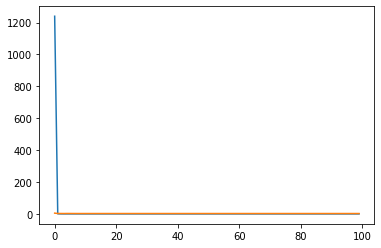

In [ ]:
# 每迭代繪製損失
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

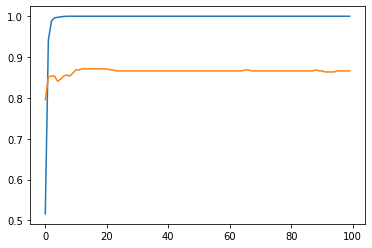

In [ ]:
# 每迭代繪製精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.show()

In [ ]:
# 評估模型
print(model.evaluate(x_train, y_train))
print(model.evaluate(x_test, y_test))

112/112 [==============================] - 35s 310ms/step - loss: 4.2617e-06 - accuracy: 1.0000
[4.261731191945728e-06, 1.0]
13/13 [==============================] - 4s 296ms/step - loss: 2.4952 - accuracy: 0.8662
[2.495185375213623, 0.8661616444587708]


In [ ]:
from sklearn.metrics import confusion_matrix
p_test = model.predict(x_test).argmax(axis=1)
cm_test = confusion_matrix(y_test, p_test)
print(cm_test)
p_train = model.predict(x_train).argmax(axis=1)
cm_train = confusion_matrix(y_train, p_train)
print(cm_train)

[[38  1  0  0  0  3  0  1  0]
 [ 0 41  0  0  1  2  0  1  1]
 [ 0  0 45  0  0  1  2  0  1]
 [ 0  1  1 40  0  0  3  0  0]
 [ 0  0  0  1 38  2  0  0  0]
 [ 0  2  3  2  0 30  5  5  0]
 [ 0  1  0  0  1  1 30  0  0]
 [ 0  2  1  3  0  0  0 42  2]
 [ 1  0  0  0  0  1  1  0 39]]
[[397   0   0   0   0   0   0   0   0]
 [  0 394   0   0   0   0   0   0   0]
 [  0   0 391   0   0   0   0   0   0]
 [  0   0   0 395   0   0   0   0   0]
 [  0   0   0   0 399   0   0   0   0]
 [  0   0   0   0   0 393   0   0   0]
 [  0   0   0   0   0   0 407   0   0]
 [  0   0   0   0   0   0   0 390   0]
 [  0   0   0   0   0   0   0   0 398]]


In [ ]:
# 總結模型各層形狀與使用參數
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 128)               50466944  
                                                             